https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

## KNN

### 1. Example

#### Defining dataset

In [1]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
# Sunny: 2, Overcast: 0, Rainy:1
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [24]:
# converting string labels into numbers
temp_encoded = le.fit_transform(temp)
y = le.fit_transform(play)

# Hot: 1, Mild:2, Cool:0
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [25]:
# No: 0, Yes: 1
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [31]:
import numpy as np
weather_encoded = np.array(weather_encoded)
temp_encoded = np.array(temp_encoded)
y = np.array(y)

In [36]:
X = np.array(list(zip(weather_encoded,temp_encoded)))
X

array([[2, 1],
       [2, 1],
       [0, 1],
       [1, 2],
       [1, 0],
       [1, 0],
       [0, 0],
       [2, 2],
       [2, 0],
       [1, 2],
       [2, 2],
       [0, 2],
       [0, 1],
       [1, 2]], dtype=int64)

In [39]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(10, 2)
(4, 2)


#### Generating Model

In [92]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

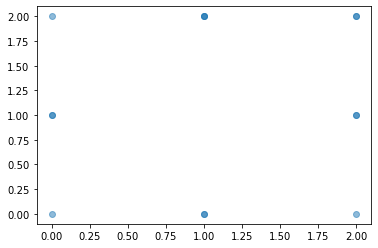

In [117]:
import matplotlib.pyplot as plt

plt.scatter(weather_encoded, temp_encoded, alpha=0.5)

In [97]:
#Predict Output
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


In [96]:
predicted2 = model.predict([(1, 1)])
predicted2

array([1], dtype=int64)

In [94]:
model.kneighbors([(1, 1)], return_distance=True) 

(array([[1., 1., 1.]]), array([[4, 0, 2]], dtype=int64))

In [82]:
X_test.shape

(4, 2)

In [98]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1], dtype=int64)

In [99]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


### 2. Example:

In [22]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


### 3. Example:

In [20]:
from sklearn.neighbors import NearestNeighbors
X = [[0], [3], [1]]

neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)
A = neigh.kneighbors_graph(X)
A.toarray()

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

### 4. Example

In [101]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [103]:
import pandas as pd

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [104]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [105]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [106]:
# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [107]:
# print target(or label)shape
print(wine.target.shape)

(178,)


In [108]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

#### For K = 5

In [110]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2,
       0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 1, 0])

In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


#### For K = 7

In [112]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [113]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


### 5. Choose K



([<matplotlib.axis.XTick at 0x215aaa6fa90>,
 <a list of 5 Text major ticklabel objects>)

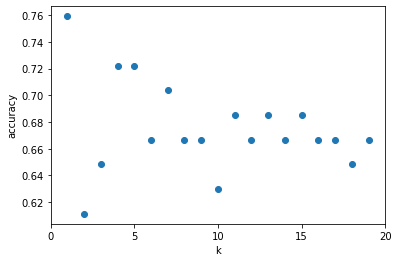

In [120]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])